In [64]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [65]:
df = pd.read_csv('german_credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [66]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [67]:
df_uc = df.sample(frac =.5)

In [68]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [69]:
# Print Shape of model data
cat_to_nonnum = pd.get_dummies(df_uc)
print(cat_to_nonnum.shape)
print(cat_to_nonnum.info())
cat_to_nonnum.head()

(500, 62)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 691 to 289
Data columns (total 62 columns):
default                                                                       500 non-null int64
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
account_check_status_0 <= ... < 200 DM                                        500 non-null uint8
account_ch

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
691,0,15,2631,3,2,25,1,1,1,0,...,1,0,0,0,0,1,1,0,0,1
640,1,18,750,4,1,27,1,1,0,1,...,1,0,0,0,1,0,1,0,0,1
40,0,30,2333,4,2,30,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
523,0,24,3488,3,4,23,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
214,0,36,3342,4,2,51,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [70]:
corr = cat_to_nonnum.corr()
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()
print(m)
print('column having False has correlation greater than 0.5 with any of the other column')

default                                                                        True
duration_in_month                                                             False
credit_amount                                                                 False
installment_as_income_perc                                                     True
present_res_since                                                              True
age                                                                            True
credits_this_bank                                                             False
people_under_maintenance                                                       True
account_check_status_0 <= ... < 200 DM                                         True
account_check_status_< 0 DM                                                   False
account_check_status_>= 200 DM / salary assignments for at least 1 year        True
account_check_status_no checking account                                    

### Drop the original variables which are converted to dummy

In [71]:
dropped_cat_col = df_uc.drop(['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'],axis=1)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [72]:
from sklearn.model_selection import train_test_split
X = dropped_cat_col.drop("default" , axis=1)
y = dropped_cat_col.pop("default")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 20, random_state=99,max_features=1)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_test, y_test))

0.7066666666666667


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

accuracy is:  0.7066666666666667


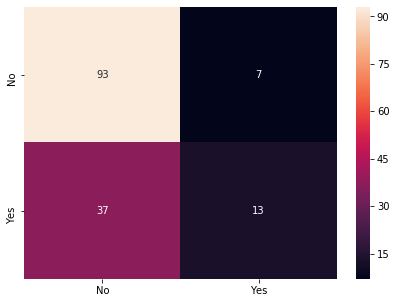

In [93]:
from sklearn import metrics
y_predict = rfcl.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

from sklearn.metrics import accuracy_score
print('accuracy is: ',accuracy_score(y_test, y_predict))

### Q6 Show the list of the features importance( 1 Marks)

In [94]:
feature_importance = rfcl.feature_importances_
print(feature_importance)

[0.20229417 0.33427882 0.07117083 0.08308579 0.24957912 0.04144354
 0.01814774]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [121]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [161]:
# Use below values
num_folds = 10
seed = 77

In [162]:
#Validate the Random Forest model build above using k fold
kf = KFold(n_splits=num_folds)
scores_rf = []

In [163]:
for train_index, test_index in kf.split(X.values):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    rfcl.fit(X_train, y_train)
    scores_rf.append(rfcl.score(X_test, y_test))

In [164]:
scores_rf

[0.56, 0.78, 0.72, 0.7, 0.7, 0.68, 0.78, 0.56, 0.54, 0.64]

In [165]:
#Calculate Mean score

In [166]:
np.mean(scores_rf)

0.6659999999999999

In [167]:
# Calculate score standard deviation using std()

In [168]:
np.std(scores_rf)

0.08392854103342913

# Q8 Print the confusion matrix( 1 Marks)

accuracy is:  0.64


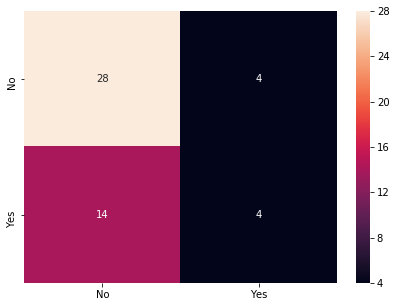

In [169]:
from sklearn import metrics
y_predict = rfcl.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

from sklearn.metrics import accuracy_score
print('accuracy is: ',accuracy_score(y_test, y_predict))

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [171]:
from sklearn.metrics import precision_score, recall_score

In [173]:
print(precision_score(y_test, y_predict, average="macro"))
print(recall_score(y_test, y_predict, average="macro"))    

0.5833333333333333
0.5486111111111112


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
